> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDB Database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

TMBD Database is  a database for movies  and it is selected for analysis with all the data in it such as realse year, budget, revenue and others 

five questions will be answered through analysing this dataset 
1)Movie that had the most runtime and least?
2)Movie that is most popular in all years?
3)Average runtime of all movies?
4)Revenue of all years?
5)Most Movie Revenue of all years?

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import pprint

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#loading the data and store it in a variable
df=pd.read_csv('tmdb-movies.csv')
#showing the first 5 rows 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#Return number of unique elements
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [5]:
#get information about the data in the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# showing the number of nulls in the dataset for each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# showing the duplicate rows number
df.duplicated().sum()

1

In [8]:
# showing the type of columns that has the type object above 
objectC=[ 'imdb_id', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies', 'release_date']
for x in objectC:
   print(x, type(df[x][0]))
# it shows all string type 

imdb_id <class 'str'>
original_title <class 'str'>
cast <class 'str'>
homepage <class 'str'>
director <class 'str'>
tagline <class 'str'>
keywords <class 'str'>
overview <class 'str'>
genres <class 'str'>
production_companies <class 'str'>
release_date <class 'str'>


In [9]:
# printing the number of rows and columns 
row, column=df.shape

In [10]:
print(' rows {0} and  columns {1}'.format((row-1), column))

 rows 10865 and  columns 21



### Data Cleaning

Some changes must be done to the dataset to make it more clear:

 1- changing the type of release date to date time 
 2- droping some unused columns 
 3- removing duplicate rows
 4- removing all 0 in the revenue and budget columns 

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# removing duplicate
df.drop_duplicates(keep ='first',inplace=True)
# printing the number of rows and columns 
rows, col = df.shape
print(' rows {0} and  columns {1}'.format((row-1), column))


 rows 10865 and  columns 21


In [12]:
#changing the release date from string to datetime
df.release_date = pd.to_datetime(df['release_date'])

In [13]:
#showing the first 5 rows 
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
# Make sure the type of release date has changed
print( type(df['release_date'][0]))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [15]:
#drop unused columns
columnD = [ 'id', 'imdb_id', 'vote_count', 'vote_average','budget_adj','revenue_adj']
df.drop(columnD, axis=1, inplace=True)
#showing the first 5 rows 
df.head()



,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015


In [16]:
# drop budget and revenue rows that has zero
delete_zero_columns = ['budget', 'revenue']
# replacing the zero with NAN then drop the NAN rows of revenue and budget 
df[delete_zero_columns] = df[delete_zero_columns].replace(0, np.NAN)
df.dropna(subset = delete_zero_columns, inplace = True)
#showing the first 5 rows 
rows, col = df.shape
print(' rows {0} and  columns {1}'.format((row-1), column))

 rows 10865 and  columns 21


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Movie that had the most runtime and least?)

In [17]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# drop rows based on the question for showing just the runtime and title of the movie that had the most and least revenue
columnD = [ 'popularity','budget','revenue', 'cast', 'homepage','director','tagline','keywords','overview','genres','production_companies','release_date','release_year']
Ndf= df.drop(columnD, axis=1)
# the max runtime 
max= Ndf['runtime'].idxmax()
# the information of the movie that is max 
max_movieN=pd.DataFrame(Ndf.loc[max])
# the min runtime 
min= Ndf['runtime'].idxmin()
# the information of the movie that is min 
min_movieN=pd.DataFrame(Ndf.loc[min])
# concat the max_movieN and min_movieN together 
max_min=pd.concat([max_movieN, min_movieN], axis=1)
# print the result 
print(max_min)
    


                  2107         5162
original_title  Carlos  Kid's Story
runtime            338           15


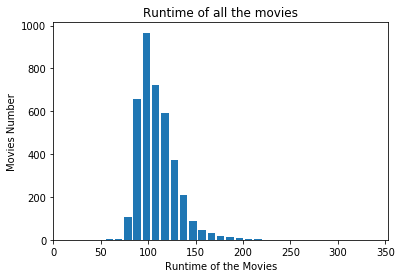

In [18]:

# histogram to show the Runtime of all movies 

# x label title
plt.xlabel('Runtime of the Movies')

# y table title
plt.ylabel('Movies Number')

# histogram title
plt.title('Runtime of all the movies')

# plotting the histogram based on the runtime 
plt.hist(df['runtime'], rwidth = 0.8, bins =33)

#displaying the histogram
plt.show()

### Runtime of all the movies plot shows the runtime of each movie and it shows the heighest runtime is 338 for the movie called carlos

### Research Question 2  (Movie that is most popular in all years!)

In [19]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

# drop columns based on the question needs
columnD = [ 'budget','revenue', 'cast', 'homepage','director','tagline','keywords','overview','runtime','genres','production_companies','release_date','release_year']
Ndf= df.drop(columnD, axis=1)
# the max of popularity
max= Ndf['popularity'].idxmax()
#the information of the max popularity
max_movieN=pd.DataFrame(Ndf.loc[max])
# showing the result    
print(max_movieN)

                             0
popularity             32.9858
original_title  Jurassic World


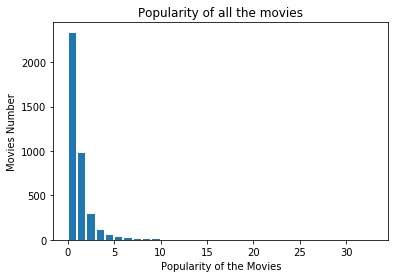

In [20]:
# histogram to show the Popularity of all movies 

# x label title
plt.xlabel('Popularity of the Movies')
# y label title
plt.ylabel('Movies Number')
# histogram title
plt.title('Popularity of all the movies')
# plotting the histogram based on the popularity 
plt.hist(df['popularity'], rwidth = 0.8, bins =33)
#displaying the histogram
plt.show()

### Popularity of all the movies plot shows how much the popularity of each movie and it shows that the most popular movie is Jurassic World (32.9858)  

###  Research Question 3 ( Average runtime of all movies?)

In [22]:
# calculating the average of runtime by using the numpy function mean
np.mean(df['runtime'])

109.22029060716139

###  Research Question 4 ( Revenue of all years?)

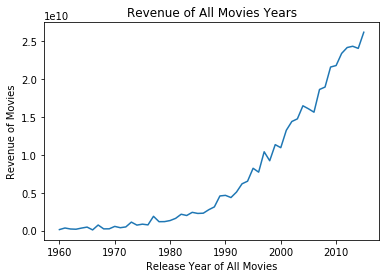

In [24]:
# histogram to show the Revenue of all years

# group the release year with the revenue and store it in a variable 
RevenueYear = df.groupby('release_year')['revenue'].sum()
# x label title
plt.xlabel('Release Year of All Movies')
# y label title
plt.ylabel('Revenue of Movies')
# histogram title
plt.title('Revenue of All Movies Years')
# plotting the histogram based on the RevenueYear 
plt.plot(RevenueYear)
#displaying the histogram
plt.show()

### Revenue of All Movies Years plot is showing the relationship of realse year vs revenue and it shows that the revenue is increased through the years 

###  Research Question 5 ( Most Movie Revenue of all years?)

In [26]:
# droping columns based on the question needs 
columnD = [ 'popularity','budget', 'cast', 'homepage','director','tagline','keywords','overview','runtime','genres','production_companies','release_date']
Rdf= df.drop(columnD, axis=1)
# calculating the max of revenue
max= Rdf['revenue'].idxmax()
# information of the max revenue 
max_movieR=pd.DataFrame(Rdf.loc[max])
# displaying the results 
print(max_movieR)
    

                       1386
revenue         2.78151e+09
original_title       Avatar
release_year           2009


<a id='conclusions'></a>
## Conclusions


 
 In the end it has been found that the dataset need cleaning such as :
 1- changing the type of release date to date time that if not changed would affect the analysis process
 2- droping some unused columns that has no use of being in the dataset 
 3- removing duplicate that if not it will cause redundancy in the dataset
 4- removing all 0 in the revenue and budget columns that are erroneous and will affect the analysis result if not removed
 
 all those were must to be handeled for the analysis process to not be affected and the results of it to be clear
 
 
 Also through the dataset it has been answered 5 questions such as:
 1) the revenue of all years that will show the relationship of realse year vs revenue
 2) average of runtime via calculating it with numpy function
 3) Most Movie Revenue of all years that shows the name of the most revenue with the year 
 4) Movie that is most popular in all years that will show the most popular movie
 5) Movie that had the most runtime and least that will show the least and most movie runtime and has a plot to emphasis on that 
 
 Limitations :
 
 TMBD Dataset is used for analysis that has a number of columns such as revenue, runtime and release time. The analysis may have limitations in many ways:
 1. It is not a sure thing that the dataset is correct or up to date 
 2. Because of the revenue and budget columns have some rows with zero that must be handle by deleting them and also the deleting may affect the overall analysis but also them being there in the dataset with being handeled with him also will affect the overall analysis more than being deleting
 3. The budget and revenue columns does not have a currency unit and each movie might have different currency from the other that may affect the overall analysis 


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])